In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset=pd.read_csv("/content/concrete_strength_dataset.csv")

In [3]:
dataset

,Cement (kg/m³),Blast Furnace Slag (kg/m³),Fly Ash (kg/m³),Water (kg/m³),Superplasticizer (kg/m³),Coarse Aggregate (kg/m³),Fine Aggregate (kg/m³),Age (days),Concrete Strength (MPa)
0,249.816048,209.448514,37.026586,187.480632,7.851171,1131.007569,869.081198,3,57.880926
1,480.285723,160.828910,108.380189,182.293644,7.409364,1105.811118,918.672559,14,86.005112
2,392.797577,92.858285,174.589167,123.333469,27.187637,1029.411581,700.187160,14,76.636101
3,339.463394,244.138506,146.444977,164.362218,7.486386,1182.418857,849.949640,28,86.856317
4,162.407456,205.419352,161.312230,169.425430,8.158492,880.189806,828.698393,56,77.721356
...,...,...,...,...,...,...,...,...,...
495,241.340891,27.474622,133.642560,205.404170,14.769764,1146.118304,684.492733,56,73.467173
496,333.462445,275.194073,123.898069,244.359901,17.318371,862.909283,945.198733,28,74.901811
497,131.093855,41.045589,92.698809,128.964542,25.967314,923.915144,954.437374,14,42.987277
498,489.757923,285.071206,75.957156,127.417114,29.422180,916.018213,678.661434,14,90.780110


In [4]:
dataset.columns

Index(['Cement (kg/m³)', 'Blast Furnace Slag (kg/m³)', 'Fly Ash (kg/m³)',
       'Water (kg/m³)', 'Superplasticizer (kg/m³)', 'Coarse Aggregate (kg/m³)',
       'Fine Aggregate (kg/m³)', 'Age (days)', 'Concrete Strength (MPa)'],
      dtype='object')

In [5]:
independent=dataset[['Cement (kg/m³)', 'Blast Furnace Slag (kg/m³)', 'Fly Ash (kg/m³)',
       'Water (kg/m³)', 'Superplasticizer (kg/m³)', 'Coarse Aggregate (kg/m³)',
       'Fine Aggregate (kg/m³)', 'Age (days)']]
dependent=dataset[['Concrete Strength (MPa)']]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.20,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [9]:
y_pred=regressor.predict(X_test)

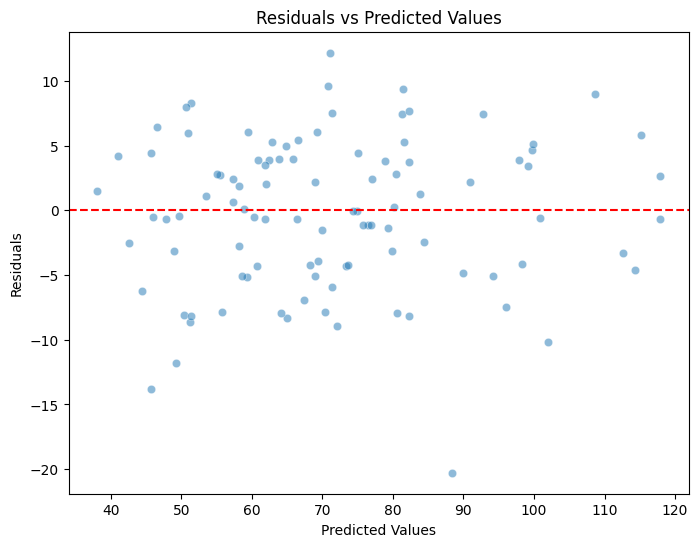

In [12]:
import numpy as np

# Ensure y_test is a NumPy array and flatten y_pred if needed
y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# Compute residuals
residuals = y_test - y_pred

# Plot residuals vs predicted values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


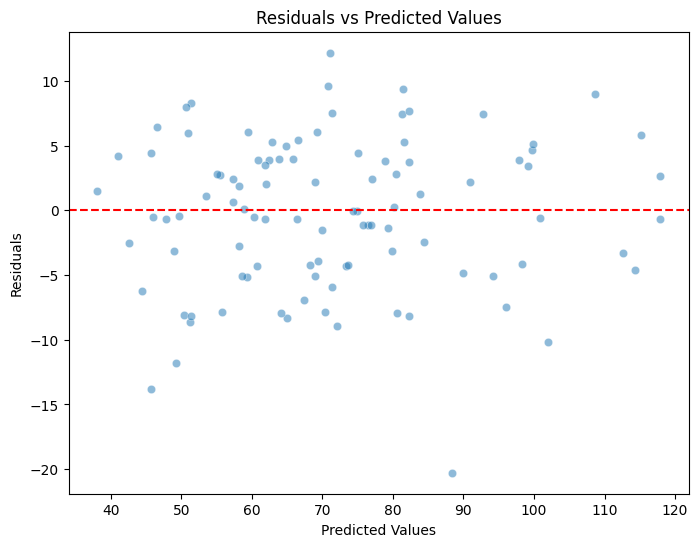

In [14]:
# Plot residuals vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at zero
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

In [15]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [16]:
r_score

0.9150654195182365

In [17]:
import pickle
filename="RF_T.sav"
pickle.dump(regressor,open(filename,'wb'))

In [18]:
loaded_model=pickle.load(open("RF_T.sav",'rb'))
result=loaded_model.predict([[249.816048,209.448514, 37.026586,	187.480632,	7.851171,	1131.007569,	869.081198,	3]])

In [19]:
result

array([123.63883911])